### K-Means Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df=df.drop(labels=['Name'],axis=1)
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


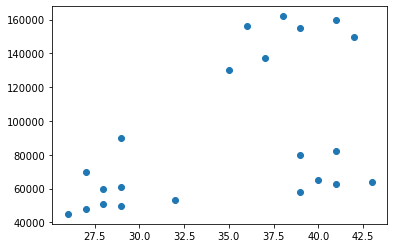

In [6]:
plt.scatter(df['Age'],df['Income($)'])
plt.show()

As the dimensions of data is 2d, we can observe that there are 3 clusters. But if dimensionality is more, we cannot visualize the data and we have to follow the elbow technique to identify the no of clusters.

In [8]:
k=3
from sklearn.cluster import KMeans
km_model=KMeans(n_clusters=k,verbose=1,n_jobs=-1)
km_model.fit(df)
y_pred=km_model.predict(df)
print(y_pred)

Initialization complete
Iteration 0, inertia 1946250846.0
Iteration 1, inertia 1577046058.883117
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1994250736.0
Iteration 1, inertia 1606229737.6785712
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1624251253.0
Iteration 1, inertia 1606229737.6785712
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2887250873.0
Iteration 1, inertia 1606229737.6785712
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2427251519.0
Iteration 1, inertia 1606229737.6785712
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1935250831.0
Iteration 1, inertia 1606229737.6785712
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2722251305.0
Iteration 1, inertia 2555933926.5333333
Converged at iteration 1: strict conver

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [9]:
df['Cluster']=y_pred
df.head()

,Age,Income($),Cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


In [11]:
df0=df[df['Cluster']==0]
df1=df[df['Cluster']==1]
df2=df[df['Cluster']==2]
df0.head()

,Age,Income($),Cluster
0,27,70000,0
1,29,90000,0
19,39,80000,0
20,41,82000,0


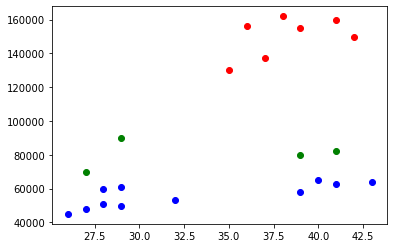

In [14]:
plt.scatter(df0['Age'],df0['Income($)'],color='green')
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.show()

we observe that the clusters which we observed earlier are different from the one which we got from KMeans. It might be because of scaling problem. Lets scale the features to same scale.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(df[['Age']])
val=scalar.transform(df[['Age']])
df['Age']=val
df.head()

,Age,Income($),Cluster
0,0.058824,70000,0
1,0.176471,90000,0
2,0.176471,61000,2
3,0.117647,60000,2
4,0.941176,150000,1


In [18]:
scalar=MinMaxScaler()
scalar.fit(df[['Income($)']])
val=scalar.transform(df[['Income($)']])
df['Income($)']=val
df.head()

,Age,Income($),Cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1


In [19]:
km_model=KMeans(n_clusters=k,n_jobs=-1)
km_model.fit(df[['Age','Income($)']])
y_pred=km_model.predict(df[['Age','Income($)']])
print(y_pred)

[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [20]:
df['Cluster']=y_pred
df.head()

,Age,Income($),Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


In [21]:
df0=df[df['Cluster']==0]
df1=df[df['Cluster']==1]
df2=df[df['Cluster']==2]
df0.head()

,Age,Income($),Cluster
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0


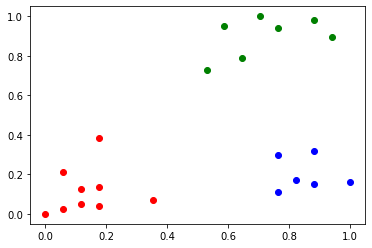

In [22]:
plt.scatter(df0['Age'],df0['Income($)'],color='green')
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.show()

Now we can see that the clusters are formed as expected after scaling

In [23]:
km_model.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [24]:
km_model.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [25]:
km_model.inertia_

0.4750783498553097

Lets check the elbow method whether we will get the same no of clusters or not.

In [27]:
k_list=np.arange(1,7)
print(k_list)

[1 2 3 4 5 6]


In [28]:
inertia_list=[]
for val in k_list:
    km_model=KMeans(n_clusters=val,n_jobs=-1)
    km_model.fit(df[['Age','Income($)']])
    inertia_list.append(km_model.inertia_)
print(inertia_list)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


[5.434011511988179, 2.091136388699078, 0.4750783498553097, 0.3491047094419566, 0.2621792762345213, 0.23377969754548303]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


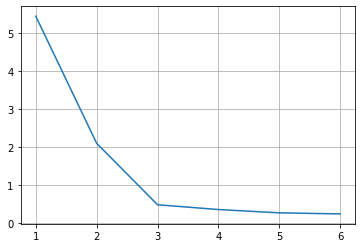

In [31]:
plt.grid('whitespace')
plt.plot(k_list,inertia_list)
plt.show()

We observe that using the elbow method, we got the same cluster size as k=3

lets check the same on a better dataset, Titanic dataset

In [96]:
df=pd.read_csv('../../Titanic-survival-prediction/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
df['Age'].fillna(value=df['Age'].median(),inplace=True)
df['Cabin'].fillna(value='Missing',inplace=True)
an_list=[]
for val in df['Cabin']:
    if val is np.nan:
        an_list.append(val)
    else:
        an_list.append(val[0])
print(len(an_list))
df['Cabin']=an_list
df.loc[df['SibSp']==5,'SibSp']=0
df.loc[df['SibSp']==8,'SibSp']=0
df.loc[df['Parch']==3,'Parch']=0
df.loc[df['Parch']==4,'Parch']=0
df.loc[df['Parch']==5,'Parch']=0
df.loc[df['Parch']==6,'Parch']=0
list1=[]
for val in df['Ticket']:
    inn=val.isnumeric()
    if(inn):
        list1.append(1)
    else:
        list1.append(0)    
print(len(list1))
df['Ticket_new']=list1
new_df=df.drop(labels=['PassengerId','Name','Ticket'],axis=1)
new_df.head()

891
891


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_new
0,0,3,male,22.0,1,0,7.2500,M,S,0
1,1,1,female,38.0,1,0,71.2833,C,C,0
2,1,3,female,26.0,0,0,7.9250,M,S,0
3,1,1,female,35.0,1,0,53.1000,C,S,1
4,0,3,male,35.0,0,0,8.0500,M,S,1


In [98]:
df['Embarked'].fillna(value='S',inplace=True)
new_df['Embarked'].fillna(value='S',inplace=True)
IQR= new_df['Age'].quantile(0.75)-new_df['Age'].quantile(0.25)
print('IQR:',IQR)
low_bound=new_df['Age'].quantile(0.25)-(IQR*2)
up_bound=new_df['Age'].quantile(0.75)+(IQR*2)
print('lower bound is {} and upper bound is {}:'.format(low_bound,up_bound))

IQR: 13.0
lower bound is -4.0 and upper bound is 61.0:


In [99]:
new_df.loc[new_df['Age']>61,'Age']=61

In [100]:
IQR= new_df['Fare'].quantile(0.75)-new_df['Fare'].quantile(0.25)
print('IQR:',IQR)
low_bound=new_df['Fare'].quantile(0.25)-(IQR*3)
up_bound=new_df['Fare'].quantile(0.75)+(IQR*3)
print('lower bound is {} and upper bound is {}:'.format(low_bound,up_bound))

IQR: 23.0896
lower bound is -61.358399999999996 and upper bound is 100.2688:


In [101]:
new_df.loc[new_df['Fare']>100,'Fare']=100

In [102]:
dict1=dict(new_df.groupby('Cabin')['Survived'].mean())
new_df['Cabin_target_mean']=new_df['Cabin'].map(dict1)
dict1=dict(new_df.groupby('Embarked')['Survived'].mean())
new_df['Embarked_target_mean']=new_df['Embarked'].map(dict1)
dict1=dict(new_df.groupby('Parch')['Survived'].mean())
new_df['Parch_target_mean']=new_df['Parch'].map(dict1)
dict1=dict(new_df.groupby('SibSp')['Survived'].mean())
new_df['SibSp_target_mean']=new_df['SibSp'].map(dict1)
dict1=dict(new_df.groupby('Sex')['Survived'].mean())
new_df['Sex_target_mean']=new_df['Sex'].map(dict1)
dict1=dict(new_df.groupby('Pclass')['Survived'].mean())
new_df['Pclass_target_mean']=new_df['Pclass'].map(dict1)
dict1=dict(new_df.groupby('Ticket_new')['Survived'].mean())
new_df['Ticket_new_target_mean']=new_df['Ticket_new'].map(dict1)
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean
0,0,3,male,22.0,1,0,7.2500,M,S,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609
1,1,1,female,38.0,1,0,71.2833,C,C,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609
2,1,3,female,26.0,0,0,7.9250,M,S,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609
3,1,1,female,35.0,1,0,53.1000,C,S,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266
4,0,3,male,35.0,0,0,8.0500,M,S,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266


In [103]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean
0,0,3,male,22.0,1,0,7.2500,M,S,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609
1,1,1,female,38.0,1,0,71.2833,C,C,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609
2,1,3,female,26.0,0,0,7.9250,M,S,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609
3,1,1,female,35.0,1,0,53.1000,C,S,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266
4,0,3,male,35.0,0,0,8.0500,M,S,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266


In [104]:
new_df.dtypes

Survived                    int64
Pclass                      int64
Sex                        object
Age                       float64
SibSp                       int64
Parch                       int64
Fare                      float64
Cabin                      object
Embarked                   object
Ticket_new                  int64
Cabin_target_mean         float64
Embarked_target_mean      float64
Parch_target_mean         float64
SibSp_target_mean         float64
Sex_target_mean           float64
Pclass_target_mean        float64
Ticket_new_target_mean    float64
dtype: object

In [105]:
rs=MinMaxScaler()
rs.fit(np.array(new_df['Fare']).reshape(-1,1))
new_df['Fare_rs']=rs.transform(np.array(new_df['Fare']).reshape(-1,1))

rs=MinMaxScaler()
rs.fit(np.array(new_df['Age']).reshape(-1,1))
new_df['Age_rs']=rs.transform(np.array(new_df['Age']).reshape(-1,1))

new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs
0,0,3,male,22.0,1,0,7.2500,M,S,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,0.356223
1,1,1,female,38.0,1,0,71.2833,C,C,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337
2,1,3,female,26.0,0,0,7.9250,M,S,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,0.422252
3,1,1,female,35.0,1,0,53.1000,C,S,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815
4,0,3,male,35.0,0,0,8.0500,M,S,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,0.570815


In [106]:
new_df['SibSp'].value_counts()

0    620
1    209
2     28
4     18
3     16
Name: SibSp, dtype: int64

In [107]:
new_df['Parch'].value_counts()

0    693
1    118
2     80
Name: Parch, dtype: int64

In [108]:
rs=MinMaxScaler()
rs.fit(np.array(new_df['Pclass']).reshape(-1,1))
new_df['Pclass_rs']=rs.transform(np.array(new_df['Pclass']).reshape(-1,1))

rs=MinMaxScaler()
rs.fit(np.array(new_df['SibSp']).reshape(-1,1))
new_df['SibSp_rs']=rs.transform(np.array(new_df['SibSp']).reshape(-1,1))

rs=MinMaxScaler()
rs.fit(np.array(new_df['Parch']).reshape(-1,1))
new_df['Parch_rs']=rs.transform(np.array(new_df['Parch']).reshape(-1,1))

new_df=new_df.drop(labels=['Age','Fare','Parch','SibSp','Pclass'],axis=1)

new_df.head()

,Survived,Sex,Cabin,Embarked,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs,Pclass_rs,SibSp_rs,Parch_rs
0,0,male,M,S,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,0.356223,1.0,0.25,0.0
1,1,female,C,C,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337,0.0,0.25,0.0
2,1,female,M,S,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,0.422252,1.0,0.00,0.0
3,1,female,C,S,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815,0.0,0.25,0.0
4,0,male,M,S,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,0.570815,1.0,0.00,0.0


In [109]:
new_df=pd.get_dummies(new_df,drop_first=True)
new_df.head()

,Survived,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S
0,0,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,...,0,0,0,0,0,0,1,0,0,1
3,1,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,...,0,1,0,0,0,0,0,0,0,1
4,0,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,...,0,0,0,0,0,0,1,0,0,1


In [110]:
x=new_df.drop(labels=['Survived'],axis=1)
y=new_df['Survived']

In [111]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)
print(extra.feature_importances_)
imp_df=pd.Series(extra.feature_importances_)
col_df=pd.Series(x.columns)
ov_df=pd.concat([imp_df,col_df],axis=1)
ov_df.columns=['Scores','Columns']
final_cols=ov_df[ov_df['Scores']>0.01]['Columns']
print(len(final_cols))

[0.01307959 0.02865051 0.01429641 0.02129847 0.02470491 0.13101648
 0.04161583 0.01198911 0.18832981 0.2186953  0.04812215 0.02212013
 0.01715014 0.14863642 0.0056447  0.00570864 0.004744   0.00797516
 0.0025863  0.00130377 0.02154293 0.00041926 0.00675445 0.01361552]
16


In [112]:
final_cols

0                 Ticket_new
1          Cabin_target_mean
2       Embarked_target_mean
3          Parch_target_mean
4          SibSp_target_mean
5            Sex_target_mean
6         Pclass_target_mean
7     Ticket_new_target_mean
8                    Fare_rs
9                     Age_rs
10                 Pclass_rs
11                  SibSp_rs
12                  Parch_rs
13                  Sex_male
20                   Cabin_M
23                Embarked_S
Name: Columns, dtype: object

In [113]:
from sklearn.cluster import KMeans
km_model=KMeans(n_clusters=2,n_jobs=-1)
km_model.fit(x[final_cols])
y_pred=km_model.predict(x[final_cols])
print(len(y_pred))

891


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [114]:
x['Cluster']=y_pred
x['Survived']=y
x.head()

,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Cluster,Survived
0,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,0.356223,...,0,0,0,0,1,0,0,1,1,0
1,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337,...,0,0,0,0,0,0,0,0,0,1
2,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,0.422252,...,0,0,0,0,1,0,0,1,1,1
3,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815,...,0,0,0,0,0,0,0,1,0,1
4,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,0.570815,...,0,0,0,0,1,0,0,1,1,0


In [115]:
cluster_0=x[x['Cluster']==0]
cluster_1=x[x['Cluster']==1]
cluster_0.head()

,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Cluster,Survived
1,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337,...,0,0,0,0,0,0,0,0,0,1
3,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815,...,0,0,0,0,0,0,0,1,0,1
6,1,0.750000,0.339009,0.341991,0.338710,0.188908,0.629630,0.384266,0.518625,0.884450,...,0,1,0,0,0,0,0,1,0,0
11,1,0.593220,0.339009,0.341991,0.338710,0.742038,0.629630,0.384266,0.265500,0.950479,...,0,0,0,0,0,0,0,1,0,1
21,1,0.757576,0.339009,0.341991,0.338710,0.188908,0.472826,0.384266,0.130000,0.554308,...,1,0,0,0,0,0,0,1,0,1


In [116]:
cluster_0['Survived'].value_counts()

1    147
0     67
Name: Survived, dtype: int64

In [117]:
cluster_1['Survived'].value_counts()

0    482
1    195
Name: Survived, dtype: int64

Hence cluster 0 is of those who survived and cluster 1 is of those who didn't.

In [118]:
x.head()

,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Cluster,Survived
0,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,0.356223,...,0,0,0,0,1,0,0,1,1,0
1,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337,...,0,0,0,0,0,0,0,0,0,1
2,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,0.422252,...,0,0,0,0,1,0,0,1,1,1
3,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815,...,0,0,0,0,0,0,0,1,0,1
4,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,0.570815,...,0,0,0,0,1,0,0,1,1,0


In [119]:
x['Cluster_new']=x['Cluster'].map({0:1,1:0})
x.head()

,Ticket_new,Cabin_target_mean,Embarked_target_mean,Parch_target_mean,SibSp_target_mean,Sex_target_mean,Pclass_target_mean,Ticket_new_target_mean,Fare_rs,Age_rs,...,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Cluster,Survived,Cluster_new
0,0,0.299854,0.339009,0.341991,0.535885,0.188908,0.242363,0.382609,0.072500,0.356223,...,0,0,0,1,0,0,1,1,0,0
1,0,0.593220,0.553571,0.341991,0.535885,0.742038,0.629630,0.382609,0.712833,0.620337,...,0,0,0,0,0,0,0,0,1,1
2,0,0.299854,0.339009,0.341991,0.338710,0.742038,0.242363,0.382609,0.079250,0.422252,...,0,0,0,1,0,0,1,1,1,0
3,1,0.593220,0.339009,0.341991,0.535885,0.742038,0.629630,0.384266,0.531000,0.570815,...,0,0,0,0,0,0,1,0,1,1
4,1,0.299854,0.339009,0.341991,0.338710,0.188908,0.242363,0.384266,0.080500,0.570815,...,0,0,0,1,0,0,1,1,0,0


In [120]:
print('accuracy_score is :',accuracy_score(x['Survived'],x['Cluster_new']))

accuracy_score is : 0.7059483726150393


We got an accuracy of 70.5% by using KMeans